In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import scipy
import xgboost
import re



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Reading the data
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
combi = train.append(test, ignore_index=True)
combi.shape

(49159, 3)

In [ ]:
#Function to remove pattern
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 


In [ ]:
#Removing words starting with @
combi['new_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


In [ ]:
#Removing punctuations 
combi['new_tweet'] = combi['new_tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
#Removing words less than 3 characters
combi['new_tweet'] = combi['new_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
combi.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
combi.shape

(49159, 4)

In [ ]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
##tokenized_tweet.head()
tokenized_tweet = combi['new_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: new_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *
s = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [s.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: new_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['new_tweet'] = tokenized_tweet

In [ ]:
combi.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [ ]:
mask = np.array(Image.open(''.join("twitter_mask.png")))
mask

array([[[  2,   2,   2, 110],
        [180, 180, 180, 238],
        [253, 253, 253, 255],
        ...,
        [250, 250, 250, 255],
        [158, 158, 158, 233],
        [  2,   2,   2, 110]],

       [[180, 180, 180, 238],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[253, 253, 253, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       ...,

       [[250, 250, 250, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       [[158, 158, 158, 233],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[  2

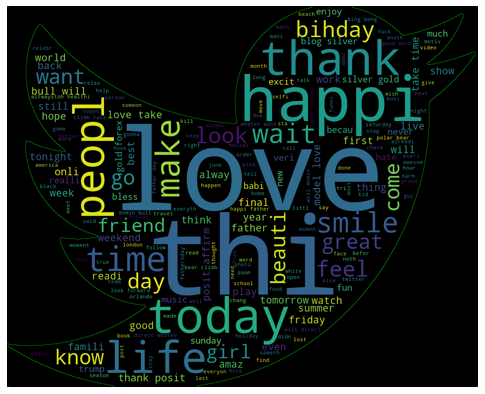

In [68]:
#Wordcloud to know most words used
from wordcloud import WordCloud, ImageColorGenerator

text = ' '.join([text for text in combi['new_tweet']])

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10, 
                      mask = mask, contour_color='green', contour_width = 0.5).generate(text) 
              

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="spline16")
plt.axis('off')
plt.show()

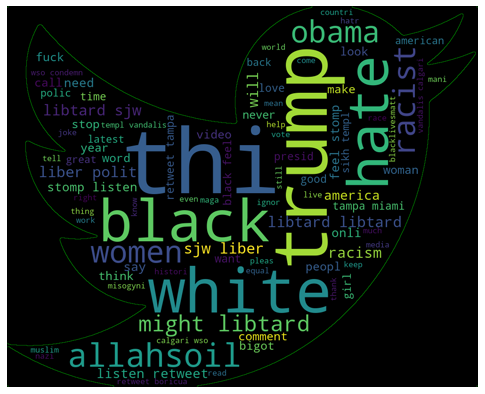

In [49]:
#Racist/Sexist tweet
negative_words = ' '.join([text for text in combi['new_tweet'][combi['label'] == 1]])

wordcloud = WordCloud(width = 800, height = 800,background_color ='black', min_font_size = 10,
                      mask = mask,contour_color='green', contour_width = 0.5).generate(negative_words) 

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="spline16")
plt.axis('off')
plt.show()

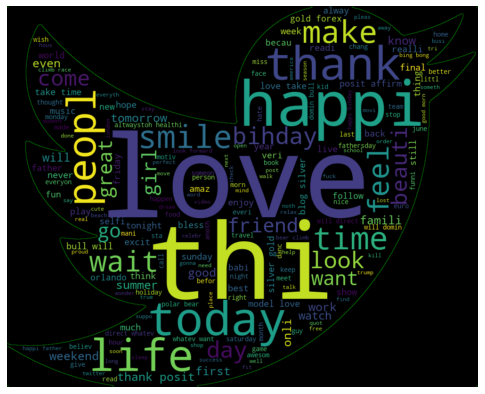

In [50]:
#Non Racist/Sexist tweet
positive_words = ' '.join([text for text in combi['new_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width = 800, height = 800,mask = mask,contour_color='green', contour_width = 0.5, 
                background_color ='black', min_font_size = 10).generate(positive_words) 

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

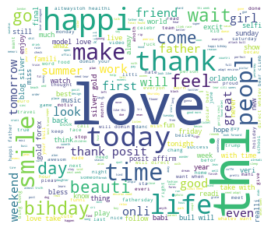

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = STOPWORDS,mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(positive_words)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [55]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [56]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['new_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['new_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

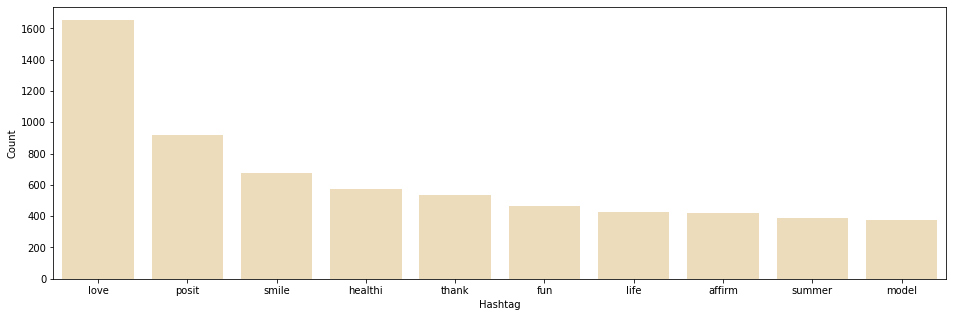

In [57]:
#Non racist hashtags 
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", color = 'wheat')
ax.set(ylabel = 'Count')
plt.show()

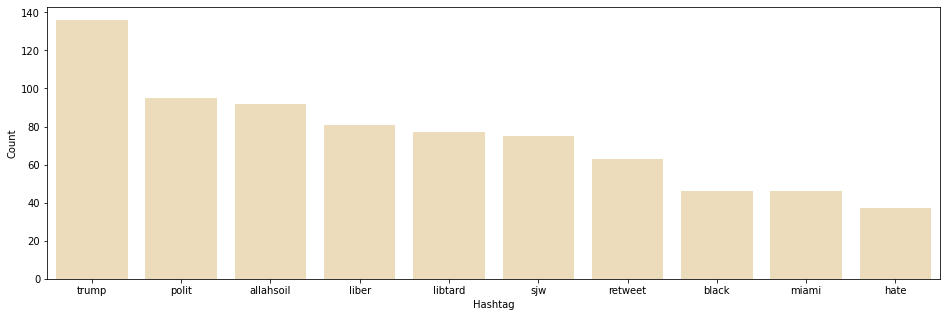

In [58]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent hashtags     
e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count", color = 'wheat')
ax.set(ylabel = 'Count')
plt.show()

In [59]:
#BOW Analysis
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
#Countvectorizer just gives a number to the bag of words feature matrix
bow = bow_vectorizer.fit_transform(combi['new_tweet']) 
#fit() is first used to find the mean and std deviation of the data to get the center data result. And then the 
#parameters are saved in the object to be used again in a new data example to forecast the same parameters mean and sigma.
#transform() is used to appply it to any set of examples.Basically, fit_transform() are the same functions performed together.
df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
#Logistic Regression Model - BOW analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
#xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
xtrain_bow, xvalid_bow, ytrain_bow, yvalid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=42)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain_bow) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
prediction_int = prediction_int.astype(np.int)

bow_score=f1_score(yvalid_bow, prediction_int) # calculating f1 score
bow_score

0.5303408146300915

In [61]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int
submission = test[['id','label']]
submission.head()


,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [ ]:
submission.to_csv('C:\\Users\\anich\\Downloads\\test_sub.csv', index=False) # writing data to a CSV file

In [62]:
#Logistic Regression Model - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['new_tweet'])

In [63]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

#Splitting the data
xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(train_tfidf,train['label'],test_size=0.3,random_state=42)

lreg.fit(xtrain_tfidf, ytrain_tfidf)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

score_tf = f1_score(yvalid_tfidf, prediction_int)
score_tf

0.5451327433628319

In [64]:
#XGBoost for BOW
from xgboost import XGBClassifier

model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
model_bow.fit(xtrain_bow, ytrain_bow)

xgb = model_bow.predict_proba(xvalid_bow)

xgb

xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(yvalid_bow,xgb_int)

xgb_bow

0.5379746835443038

In [65]:
#XGBoost for TF-IDF
from xgboost import XGBClassifier

model_tfidf = XGBClassifier(random_state=22,learning_rate=0.9)
model_tfidf.fit(xtrain_tfidf, ytrain_tfidf)

xgb_tfidf = model_tfidf.predict_proba(xvalid_tfidf)

xgb_tfidf

xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
xgb_tfidf_f1=f1_score(yvalid_tfidf,xgb_int_tfidf)

xgb_tfidf_f1

0.5327029156816391

In [66]:
#Comparing the models for BOW
Title = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','LogisticRegression(TF-IDF)', 'XGBoost(TF-IDF)']

score = [bow_score,xgb_bow,score_tf ,xgb_tfidf_f1]

compare = pd.DataFrame({'Model':Title,'F1_Score':score},index=[i for i in range(1,5)])

compare

,Model,F1_Score
1,LogisticRegression(Bag-of-Words),0.530341
2,XGBoost(Bag-of-Words),0.537975
3,LogisticRegression(TF-IDF),0.545133
4,XGBoost(TF-IDF),0.532703


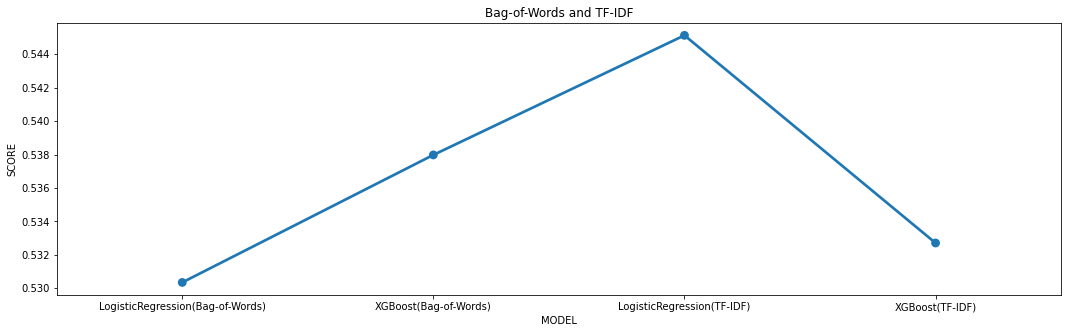

In [67]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Bag-of-Words and TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()